# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Novia Rahmadhani Purnomo
- **Email:** noviarp17@student.ub.ac.id
- **ID Dicoding:** mc006d5x2415

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca (temperatur dan kelembapan) mempengaruhi jumlah penyewaan sepeda setiap harinya?
- Pada tanggal berapa terdapat penyewaan sepeda tertinggi dan berapa jumlah penyewaan tertingginya?

## Import Semua Packages/Library yang Digunakan

In [11]:
from google.colab import files

# Upload the files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [12]:
import pandas as pd

# Load the uploaded files into pandas DataFrames
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

In [ ]:
hour_df.head(), day_df.head()

(   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1   0        0        6           0   
 1        2  2011-01-01       1   0     1   1        0        6           0   
 2        3  2011-01-01       1   0     1   2        0        6           0   
 3        4  2011-01-01       1   0     1   3        0        6           0   
 4        5  2011-01-01       1   0     1   4        0        6           0   
 
    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
 0           1  0.24  0.2879  0.81        0.0       3          13   16  
 1           1  0.22  0.2727  0.80        0.0       8          32   40  
 2           1  0.22  0.2727  0.80        0.0       5          27   32  
 3           1  0.24  0.2879  0.75        0.0       3          10   13  
 4           1  0.24  0.2879  0.75        0.0       0           1    1  ,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        

## Data Wrangling

### Gathering Data

In [13]:
hour_df.head(), day_df.head()

(   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1   0        0        6           0   
 1        2  2011-01-01       1   0     1   1        0        6           0   
 2        3  2011-01-01       1   0     1   2        0        6           0   
 3        4  2011-01-01       1   0     1   3        0        6           0   
 4        5  2011-01-01       1   0     1   4        0        6           0   
 
    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
 0           1  0.24  0.2879  0.81        0.0       3          13   16  
 1           1  0.22  0.2727  0.80        0.0       8          32   40  
 2           1  0.22  0.2727  0.80        0.0       5          27   32  
 3           1  0.24  0.2879  0.75        0.0       3          10   13  
 4           1  0.24  0.2879  0.75        0.0       0           1    1  ,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        

**Insight:**
- hour_df berisi data per jam, termasuk suhu, kelembapan, dan fitur lainnya seperti kondisi cuaca, sementara day_df berisi data yang teragregasi per hari.
- Data yang tersedia berasal dari dua tahun (2011-2012), dengan pengukuran dilakukan secara per jam (hour.csv) dan per hari (day.csv).
- Dataset ini memiliki kolom seperti dteday, season, temp, humidity, dan cnt (total penyewaan sepeda) yang berguna untuk menjawab pertanyaan bisnis.

### Assessing Data

In [14]:
# Check for missing values in both datasets
hour_missing = hour_df.isnull().sum()
day_missing = day_df.isnull().sum()

# Check the data types of the columns
hour_data_types = hour_df.dtypes
day_data_types = day_df.dtypes

hour_missing, day_missing, hour_data_types, day_data_types

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant         int64
 dteday         object
 season          int64
 yr              int64
 mnth            int64
 hr              int64
 holiday         int64
 weekday         int64
 workingday      int64
 weathersit      int64
 temp          float64
 atemp         float64
 hum           float64
 windspeed     float64
 casual          int64
 registered      int64
 cnt             int64
 dtype: object,
 i

**Insight:**
- Dalam kedua dataset (hour.csv dan day.csv), tidak ada nilai yang hilang (missing values) pada kolom manapun, karena semua nilai pada dataset terisi (0 missing values) yang berarti dataset sudah cukup bersih untuk 'missing values'

In [15]:
# Check for duplicate rows in both datasets
hour_duplicates = hour_df.duplicated().sum()  # Count duplicate rows in hour dataset
day_duplicates = day_df.duplicated().sum()    # Count duplicate rows in day dataset

hour_duplicates, day_duplicates

(0, 0)

**Insight :**

Dalam kedua dataset (hour.csv dan day.csv), tidak ada nilai yang terduplikasi (duplicates value) pada kolom manapun, karena semua nilai pada dataset terisi (0,0) yang berarti dataset sudah cukup bersih untuk 'duplicate values'

In [16]:
#Inaccurate Values

# Check for unrealistic temperature values
hour_df[hour_df['temp'] < -40]  # Values below -40°C
hour_df[hour_df['temp'] > 50]   # Values above 50°C

# Check for unrealistic humidity values
hour_df[hour_df['hum'] < 0]  # Values below 0%
hour_df[hour_df['hum'] > 100] # Values above 100%

# Check for unrealistic windspeed values
hour_df[hour_df['windspeed'] < 0]  # Values below 0
hour_df[hour_df['windspeed'] > 67]  # Values above 67

# Check for unrealistic temperature values
print("Temperatures below -40°C:")
print(hour_df[hour_df['temp'] < -40])  # Values below -40°C

print("\nTemperatures above 50°C:")
print(hour_df[hour_df['temp'] > 50])   # Values above 50°C

# Check for unrealistic humidity values
print("\nHumidity below 0%:")
print(hour_df[hour_df['hum'] < 0])  # Values below 0%

print("\nHumidity above 100%:")
print(hour_df[hour_df['hum'] > 100]) # Values above 100%

# Check for unrealistic windspeed values
print("\nWindspeed below 0:")
print(hour_df[hour_df['windspeed'] < 0])  # Values below 0

print("\nWindspeed above 67:")
print(hour_df[hour_df['windspeed'] > 67])  # Values above 67


Temperatures below -40°C:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Temperatures above 50°C:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Humidity below 0%:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Humidity above 100%:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Windspeed below 0:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Windspeed above 67:
Empty Data

**Insight :**

Dalam kedua dataset (hour.csv dan day.csv), semua nilai akurat/ tidak ada nilai aneh pada kolom manapun, yang berarti dataset sudah cukup bersih untuk 'innacurate values'

In [17]:
# Check for inconsistent values between holiday and workingday
inconsistent_holiday_workingday = hour_df[(hour_df['holiday'] == 1) & (hour_df['workingday'] == 1)]

# Check for invalid hours
invalid_hours = hour_df[(hour_df['hr'] < 0) | (hour_df['hr'] > 23)]

inconsistent_holiday_workingday, invalid_hours

(Empty DataFrame
 Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
 Index: [],
 Empty DataFrame
 Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
 Index: [])

**Insight :**
- Hasil dari pengecekan nilai inconsistent menunjukkan bahwa tidak ada data yang tidak konsisten antara kolom holiday dan workingday, yang berarti tidak ada baris di mana kedua kolom tersebut memiliki nilai 1 pada saat yang sama. Ini adalah hal yang baik karena kita menghindari inkonsistensi antara hari libur dan hari kerja yang seharusnya tidak terjadi secara bersamaan.
- tidak ada jam yang tidak valid (jam di luar rentang 0-23) pada kolom hr, yang menunjukkan bahwa data jam sudah valid dan berada dalam rentang yang sesuai.

In [18]:
# Calculate IQR for numerical columns (e.g., temp, hum, windspeed, cnt)
Q1 = hour_df[['temp', 'hum', 'windspeed', 'cnt']].quantile(0.25)
Q3 = hour_df[['temp', 'hum', 'windspeed', 'cnt']].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR
outliers = ((hour_df[['temp', 'hum', 'windspeed', 'cnt']] < (Q1 - 3 * IQR)) |
            (hour_df[['temp', 'hum', 'windspeed', 'cnt']] > (Q3 + 3 * IQR)))

outliers.sum()  # Count number of outliers in each column


,0
temp,0
hum,0
windspeed,10
cnt,0


**Insight :**
- menggunakan teknik IQR dengan nilai cutoff 3
- Kolom temp, hum, dan cnt tidak mengandung outliers berdasarkan metode IQR.
- Kolom windspeed memiliki 10 outliers yang perlu diperiksa lebih lanjut dan ditangani.

### Cleaning Data

In [19]:
# Replace outliers with the median value (for windspeed column)
median_windspeed = hour_df['windspeed'].median()
hour_df['windspeed'] = hour_df['windspeed'].where(~outliers['windspeed'], median_windspeed)

# Recalculate the IQR after replacing outliers
Q1 = hour_df[['temp', 'hum', 'windspeed', 'cnt']].quantile(0.25)
Q3 = hour_df[['temp', 'hum', 'windspeed', 'cnt']].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers again using IQR
outliers = ((hour_df[['temp', 'hum', 'windspeed', 'cnt']] < (Q1 - 3 * IQR)) |
            (hour_df[['temp', 'hum', 'windspeed', 'cnt']] > (Q3 + 3 * IQR)))

# Check the total number of outliers in each column after cleaning
outliers.sum()


,0
temp,0
hum,0
windspeed,0
cnt,0


**Insight:**
- dibandingkan menghapus data, saya memilih untuk mengganti outliers pada 'windspeed' menjadi median
- setelah dilakukan cleaning dengan 'replace', hasil semua outliners 0 yang berarti sudah tidak ada data yang memiliki nilai ekstrem

## Exploratory Data Analysis (EDA)

### Explore The Correlation of Key Numerical Features (temp, windspeed, hum, and cnt)

In [20]:
# Correlation matrix to examine relationships between numerical columns
correlation_matrix_hour = hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
correlation_matrix_day = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()

correlation_matrix_hour, correlation_matrix_day


(               temp       hum  windspeed       cnt
 temp       1.000000 -0.069881  -0.023264  0.404772
 hum       -0.069881  1.000000  -0.289568 -0.322911
 windspeed -0.023264 -0.289568   1.000000  0.094612
 cnt        0.404772 -0.322911   0.094612  1.000000,
                temp       hum  windspeed       cnt
 temp       1.000000  0.126963  -0.157944  0.627494
 hum        0.126963  1.000000  -0.248489 -0.100659
 windspeed -0.157944 -0.248489   1.000000 -0.234545
 cnt        0.627494 -0.100659  -0.234545  1.000000)

**Insight:**
- Korelasi positif : ditemukan antara suhu dan jumlah sewa sepeda (cnt) pada kedua dataset (per jam dan per hari). Hal ini menunjukkan bahwa semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Korelasi ini lebih kuat pada dataset harian (0.63), yang berarti suhu memiliki pengaruh yang lebih besar terhadap jumlah sewa sepeda jika dilihat secara agregat per hari.
- Terdapat korelasi negatif : antara kelembaban dan jumlah sewa sepeda pada dataset per jam (-0.32) dan korelasi negatif lemah pada dataset per hari (-0.10). Ini menunjukkan bahwa kelembaban yang lebih tinggi cenderung mengurangi minat orang untuk menyewa sepeda. Meskipun pengaruh kelembaban terhadap sewa sepeda lebih lemah pada dataset harian, namun kecenderungannya tetap jelas.
- Korelasi positif sangat lemah :  ditemukan antara kecepatan angin dan jumlah sewa sepeda pada dataset per jam (0.09), yang mengindikasikan bahwa kecepatan angin hampir tidak mempengaruhi jumlah sewa sepeda. Pada dataset harian, korelasinya lebih negatif (-0.23), namun tetap lemah, yang menunjukkan bahwa kecepatan angin sedikit berpengaruh negatif terhadap jumlah sewa sepeda, meskipun pengaruhnya tidak signifikan.
- Terdapat korelasi positif lemah antara suhu dan kelembaban : pada dataset per hari (0.13), yang menunjukkan bahwa suhu yang lebih tinggi sedikit lebih terkait dengan kelembaban yang lebih tinggi. Namun, hubungan ini sangat lemah dan tidak signifikan.
- Korelasi negatif : antara kecepatan angin dan kelembaban ditemukan pada kedua dataset, baik per jam (-0.29) maupun per hari (-0.25). Ini menunjukkan bahwa saat kelembaban meningkat, kecepatan angin cenderung lebih rendah, yang mungkin menunjukkan kondisi cuaca yang lebih tenang.

### Identifying Relationships of Key Numerical Features (temp, windspeed, hum, and cnt)

In [23]:
# Group by weather conditions and check rental counts
hour_weather_rentals = hour_df.groupby('weathersit')[['cnt']].mean()
day_weather_rentals = day_df.groupby('weathersit')[['cnt']].mean()

hour_weather_rentals, day_weather_rentals


(                   cnt
 weathersit            
 1           204.869272
 2           175.165493
 3           111.579281
 4            74.333333,
                     cnt
 weathersit             
 1           4876.786177
 2           4035.862348
 3           1803.285714)

**Insights :**

- Hasil Pengelompokan Berdasarkan Data Per Jam
  1. Cuaca Cerah (weathersit = 1): Pada kondisi cuaca cerah, rata-rata jumlah sepeda yang disewa per jam adalah 204.87. Ini adalah kondisi cuaca terbaik untuk bersepeda.
  2. Cuaca Berkabut atau Berawan (weathersit = 2): Pada cuaca berkabut atau berawan, rata-rata jumlah sewa sepeda sedikit lebih rendah, yaitu 175.17.
  3. Cuaca Hujan Ringan atau Salju Ringan (weathersit = 3): Pada kondisi hujan ringan atau salju ringan, jumlah sewa sepeda menurun lebih jauh dengan rata-rata 111.58.
  4. Cuaca Hujan Lebat atau Salju Lebat (weathersit = 4): Pada cuaca ekstrem seperti hujan lebat atau salju, jumlah sewa sepeda sangat rendah, dengan rata-rata hanya 74.33.

- Hasil Pengelompokan Berdasaekan Data Per Hari
  1. Cuaca Cerah (weathersit = 1): Pada kondisi cuaca cerah, rata-rata jumlah sepeda yang disewa per hari adalah 4876.79. Seperti yang diharapkan, cuaca cerah mendorong banyak orang untuk menyewa sepeda.
  2. Cuaca Berkabut atau Berawan (weathersit = 2): Pada cuaca berkabut atau berawan, rata-rata jumlah sewa sepeda menurun menjadi 4035.86 per hari.
  3. Cuaca Hujan Ringan atau Salju Ringan (weathersit = 3): Pada kondisi hujan ringan atau salju ringan, jumlah sewa sepeda menurun drastis menjadi 1803.29 per hari.
- Kesimpulan : Cuaca cerah selalu menghasilkan sewa sepeda tertinggi, baik data per jam maupun per hari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca (temperatur dan kelembapan) mempengaruhi jumlah penyewaan sepeda setiap harinya?

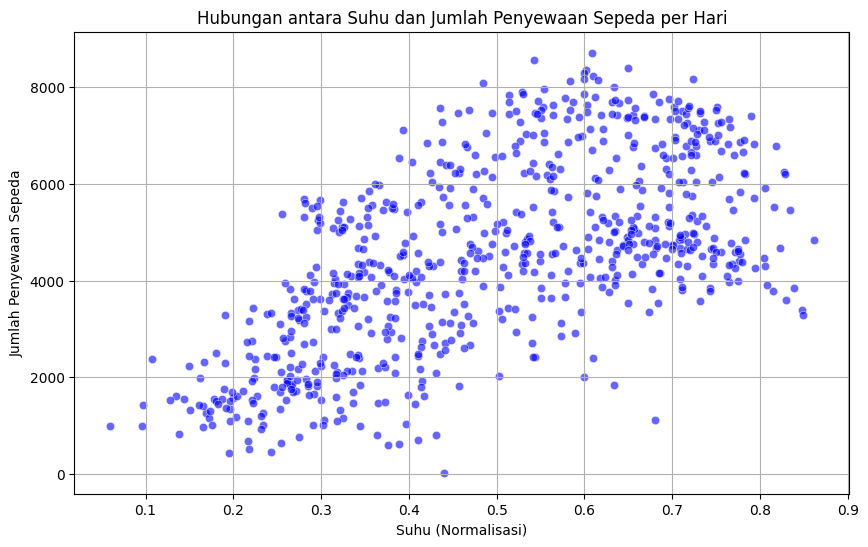

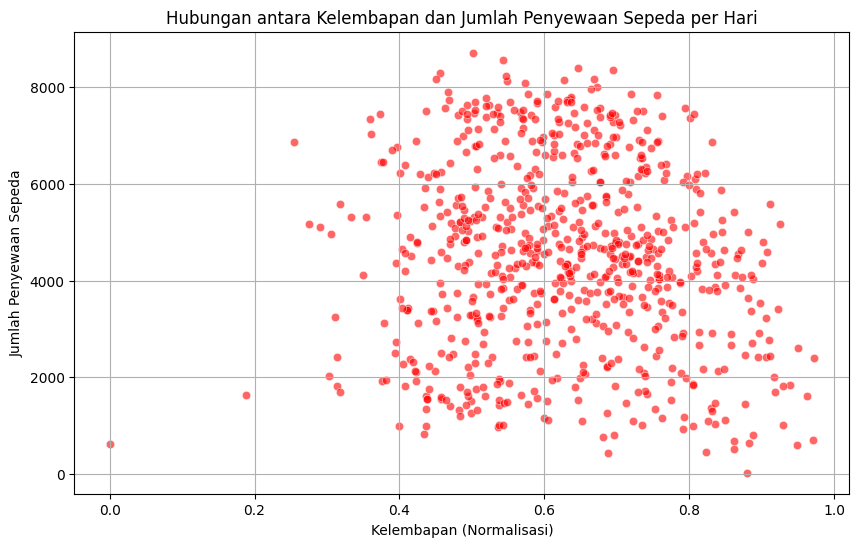

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# temp vs rent in a day
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt', color='blue', alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.show()

# hum vs rent in a day
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='hum', y='cnt', color='red', alpha=0.6)
plt.title('Hubungan antara Kelembapan dan Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Kelembapan (Normalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.show()


### Pertanyaan 2: Pada tanggal berapa terdapat penyewaan sepeda tertinggi dan berapa jumlah penyewaan tertingginya?

In [34]:
# Convert the 'dteday' column to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Group by day to find the total rental count for each day
daily_rentals = day_df.groupby('dteday')['cnt'].sum()

# Find the day with the highest rental count
max_rentals_day = daily_rentals.idxmax()  # Get the date of the highest rental
max_rentals_count = daily_rentals.max()   # Get the highest rental count

# Print the result
print(f"Day with highest bike rentals: {max_rentals_day}")
print(f"Number of rentals on that day: {max_rentals_count}")

Day with highest bike rentals: 2012-09-15 00:00:00
Number of rentals on that day: 8714


**Insight:**
Penyewaan tertinggi pada tanggal 15 September 2012 dengan jumlah sewa 8714

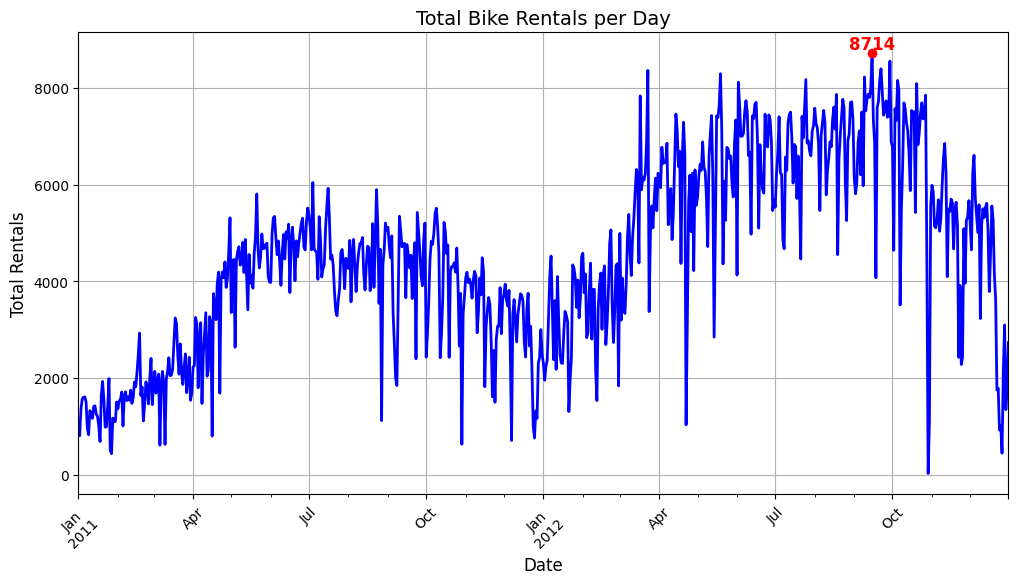

In [35]:
import matplotlib.pyplot as plt

# Group by day to find the total rental count for each day
daily_rentals = day_df.groupby('dteday')['cnt'].sum()

# Plotting the daily rentals
plt.figure(figsize=(12, 6))
daily_rentals.plot(kind='line', color='blue', linewidth=2)

# Highlight the day with the highest rentals
max_rentals_day = daily_rentals.idxmax()
max_rentals_count = daily_rentals.max()

plt.scatter(max_rentals_day, max_rentals_count, color='red', zorder=5)
plt.text(max_rentals_day, max_rentals_count + 100, f'{max_rentals_count}',
         ha='center', color='red', fontsize=12, fontweight='bold')

# Adding labels and title
plt.title('Total Bike Rentals per Day', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


## Conclusion

- Conclution pertanyaan 1 : Suhu yang lebih tinggi cenderung meningkatkan jumlah penyewaan sepeda per hari, sementara kelembapan yang lebih tinggi cenderung mengurangi jumlah penyewaan sepeda.
- Conclution pertanyaan 2 : jumlah penyewaan unit paling tinggi sebesar 8714 pada tanggal 15 September 2012